# Урок 8. Снижение размерности данных. Домашняя работа

## 1. Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните качество классификации по отложенной выборке.


Оценивать работу модели будем по метрикам accuracy и f1(macro), так как датасет сбалансирован по классам

In [186]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score as f1, accuracy_score as acc
import seaborn as sns

In [187]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [188]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

Оценим работу модели Дерево решений для исходных данных (4 признака)

In [189]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = standard_scale(X)

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state = 100)

In [192]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [193]:
y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)

In [194]:
acc_train, acc_test, f1_train, f1_test = acc(y_train, y_pred_train), acc(y_test, y_pred_test), f1(y_train, y_pred_train, average = 'macro'), f1(y_test, y_pred_test, average = 'macro')

In [195]:
print(f'До снижениия размерности accuracy train {round(acc_train,4)}, f1 train {round(f1_train,4)}, accuracy test {round(acc_test,4)}, f1 test {round(f1_test,4)}')

До снижениия размерности accuracy train 1.0, f1 train 1.0, accuracy test 0.9474, f1 test 0.9429


Теперь попробуем снижать размерность с помощью PCA до разного количества компонент и оценим работу модели

In [196]:
n = [3,2,1]

In [197]:
for el in n:
    pca = PCA(n_components=el)
    x_train_reduced = pca.fit_transform(x_train)
    x_test_reduced = pca.transform(x_test)
    tree.fit(x_train_reduced, y_train)
    y_pred_train = tree.predict(x_train_reduced)
    y_pred_test = tree.predict(x_test_reduced)
    acc_train, acc_test, f1_train, f1_test = acc(y_train, y_pred_train), acc(y_test, y_pred_test), f1(y_train, y_pred_train, average = 'macro'), f1(y_test, y_pred_test, average = 'macro')
    print(f'{el} components: accuracy train {round(acc_train,4)}, f1 train {round(f1_train, 4)}, accuracy test {round(acc_test, 4)}, f1 test {round(f1_test, 4)}')

3 components: accuracy train 1.0, f1 train 1.0, accuracy test 0.9474, f1 test 0.9429
2 components: accuracy train 1.0, f1 train 1.0, accuracy test 0.9474, f1 test 0.9429
1 components: accuracy train 1.0, f1 train 1.0, accuracy test 0.8947, f1 test 0.8881


Вывод: после снижения размерности до 3х и потом до 2х компонент модель работает так же хорошо, как и без PCA. Можно в данной задаче снизить размерность до 2х компонент. Одна компонента приводит к ухудшению качества работы модели. Можно сделать вывод, что большая часть решающей информации для разбиения по классам содержится в двух компонентах.

Данные после снижения размерности PCA до 2х компонент можно визуализировать. Посмотрим на тренировочные данные.

/home/ekaterina/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

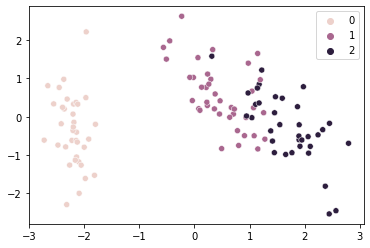

In [198]:
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train)

sns.scatterplot(x_train_reduced[:,0], x_train_reduced[:,1], hue = y_train)

## 2. Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [226]:
# так как X = U@D@Vh, при расчете главных компонент X@Vмакс.соб.знач. = U@Dмакс.соб.знач, так как V - ортагональная и Vh@V = I 

#функция расчета компонент на основе svd
def pca_svd(x, n_components):
    u, s, vh = np.linalg.svd(x)
    s_matrix = np.zeros((u.shape[1], n_components))
    for i in range(n_components):
        s_matrix[i,i] = s[i]
    
    return u@s_matrix

In [227]:
#полученные 2 компоненты с помощью svd
x_reduced_svd = pca_svd(X, 2)
np.around(x_reduced_svd,2)

array([[-2.26, -0.48],
       [-2.08,  0.67],
       [-2.36,  0.34],
       [-2.3 ,  0.6 ],
       [-2.39, -0.65],
       [-2.08, -1.49],
       [-2.44, -0.05],
       [-2.23, -0.22],
       [-2.33,  1.12],
       [-2.18,  0.47],
       [-2.17, -1.04],
       [-2.33, -0.13],
       [-2.22,  0.73],
       [-2.63,  0.96],
       [-2.2 , -1.86],
       [-2.26, -2.69],
       [-2.21, -1.48],
       [-2.19, -0.49],
       [-1.9 , -1.41],
       [-2.34, -1.13],
       [-1.91, -0.41],
       [-2.21, -0.92],
       [-2.77, -0.46],
       [-1.82, -0.09],
       [-2.23, -0.14],
       [-1.95,  0.63],
       [-2.05, -0.24],
       [-2.17, -0.53],
       [-2.14, -0.31],
       [-2.27,  0.34],
       [-2.14,  0.5 ],
       [-1.83, -0.42],
       [-2.61, -1.79],
       [-2.45, -2.15],
       [-2.11,  0.46],
       [-2.21,  0.21],
       [-2.05, -0.66],
       [-2.53, -0.59],
       [-2.43,  0.9 ],
       [-2.17, -0.27],
       [-2.29, -0.44],
       [-1.86,  2.34],
       [-2.55,  0.48],
       [-1.

In [228]:
#компоненты с помощью PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(X)
np.around(x_reduced,2)

array([[-2.26,  0.48],
       [-2.08, -0.67],
       [-2.36, -0.34],
       [-2.3 , -0.6 ],
       [-2.39,  0.65],
       [-2.08,  1.49],
       [-2.44,  0.05],
       [-2.23,  0.22],
       [-2.33, -1.12],
       [-2.18, -0.47],
       [-2.17,  1.04],
       [-2.33,  0.13],
       [-2.22, -0.73],
       [-2.63, -0.96],
       [-2.2 ,  1.86],
       [-2.26,  2.69],
       [-2.21,  1.48],
       [-2.19,  0.49],
       [-1.9 ,  1.41],
       [-2.34,  1.13],
       [-1.91,  0.41],
       [-2.21,  0.92],
       [-2.77,  0.46],
       [-1.82,  0.09],
       [-2.23,  0.14],
       [-1.95, -0.63],
       [-2.05,  0.24],
       [-2.17,  0.53],
       [-2.14,  0.31],
       [-2.27, -0.34],
       [-2.14, -0.5 ],
       [-1.83,  0.42],
       [-2.61,  1.79],
       [-2.45,  2.15],
       [-2.11, -0.46],
       [-2.21, -0.21],
       [-2.05,  0.66],
       [-2.53,  0.59],
       [-2.43, -0.9 ],
       [-2.17,  0.27],
       [-2.29,  0.44],
       [-1.86, -2.34],
       [-2.55, -0.48],
       [-1.

Визуализируем компоненты, полученные с помощью встроенного метода PCA и нашей функции на базе svd

/home/ekaterina/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

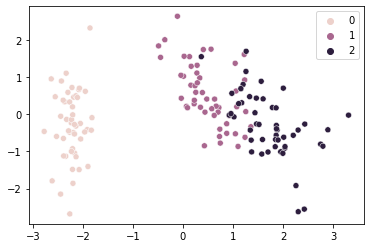

In [231]:
#наша функция svd
sns.scatterplot(x_reduced_svd[:,0], x_reduced_svd[:,1], hue = y)

/home/ekaterina/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

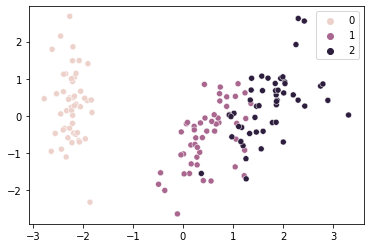

In [232]:
#PCA sklearn
sns.scatterplot(x_reduced[:,0], x_reduced[:,1], hue = y)

Вывод: Расчет главных компонент на базе svd дает компоненты аналогично PCA, но их зеркальное отображение. На графиках это видно. Для модели эти данные имеют одинаковую информативность.